<a href="https://colab.research.google.com/github/TejaswiReddySandi/deep-learning-assignments/blob/main/DL_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(150, 2)
(150,)


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

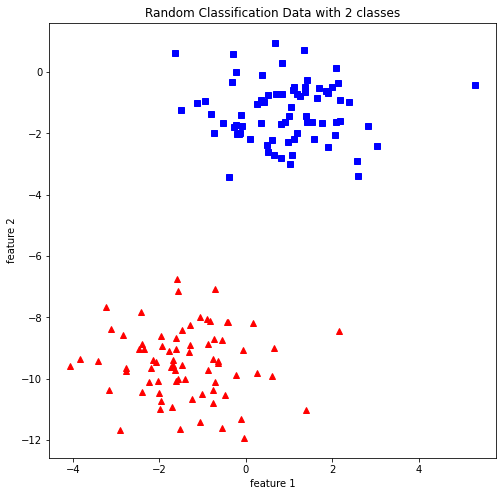

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
x, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
print(x.shape)
print(y.shape)

#Plotting
fig = plt.figure(figsize=(8,8))
plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], 'r^')
plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [ ]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

In [ ]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [ ]:
def perceptron(x, y, lr, epochs):
    m, n = x.shape
    theta = np.zeros((n+1,1))
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        n_miss = 0
        for idx, x_i in enumerate(x):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = sigmoid(np.dot(x_i.T, theta))
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                n_miss += 1
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

In [ ]:
def plot_decision_boundary(x, theta):
    x1 = [min(x[:,0]), max(x[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "r^")
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')

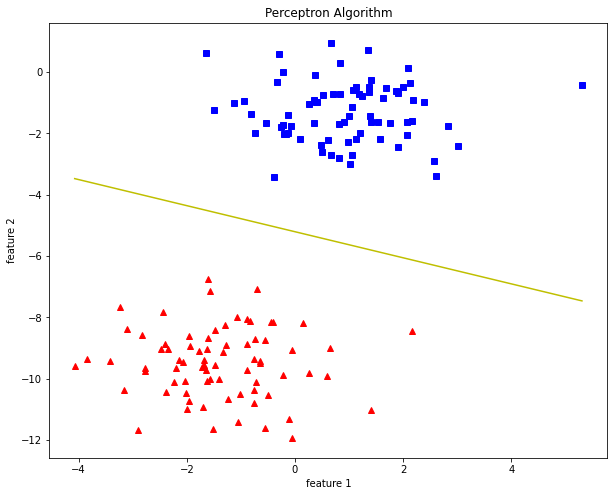

In [ ]:
theta, miss_l = perceptron(x, y, 0.5, 100)
plot_decision_boundary(x, theta)